# Data


## Importing data

In [ ]:
import numpy as np
import pandas as pd
import gdown
import random
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Data from Eesti avaandmed (Estonian open data)
url_2021 = "https://drive.google.com/file/d/13rOuHFt0Io6XBywgMksuv3kijHpr2GHn/view?usp=sharing"
se_2021 = "se_2021.csv"
gdown.download(url_2021, se_2021, fuzzy=True)
se_2021 = pd.read_csv("se_2021.csv", encoding='utf-8', index_col=False)

url_2022 = "https://drive.google.com/file/d/1p9URjb13EaL1K4AXJAZsH-BdCqdbqpk1/view?usp=sharing"
se_2022 = "se_2022.csv"
gdown.download(url_2022, se_2022, fuzzy=True)
se_2022 = pd.read_csv("se_2022.csv", encoding='utf-8', index_col=False)

url_2023 = "https://drive.google.com/file/d/1ApSHKUmiIDVk5XkbRRh40872XdES_xUU/view?usp=sharing"
se_2023 = "se_2023.csv"
gdown.download(url_2023, se_2023, fuzzy=True)
se_2023 = pd.read_csv("se_2023.csv", encoding='utf-8', index_col=False)

data = pd.concat([se_2021, se_2022, se_2023], axis=0)
data.reset_index(drop=True, inplace=True)

Downloading...
From: https://drive.google.com/uc?id=13rOuHFt0Io6XBywgMksuv3kijHpr2GHn
To: /content/se_2021.csv
100%|██████████| 4.68M/4.68M [00:00<00:00, 31.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p9URjb13EaL1K4AXJAZsH-BdCqdbqpk1
To: /content/se_2022.csv
100%|██████████| 5.16M/5.16M [00:00<00:00, 27.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ApSHKUmiIDVk5XkbRRh40872XdES_xUU
To: /content/se_2023.csv
100%|██████████| 4.67M/4.67M [00:00<00:00, 29.8MB/s]


## Info about data

In [ ]:
pd.set_option('display.max_columns', None)
data

,EKSAMI_SOORITAJA,KUUPAEV,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD
0,fd4a476c2fff5845,2021-01,Haapsalu,B,101,osaühing KLIMBERG,E,31451a368e962058,SOORITATUD,50.0,NaN,NaN,NaN
1,8fe3816987e62971,2021-01,Jõgeva,B,101,OÜ AUTOSÕIT,E,ae264be409f2ca9f,MITTE_SOORITATUD,24.0,NaN,EESOIGUS,NaN
2,1131ad82d5710721,2021-01,Põlva,B,101,H&M MERTENS OÜ,E,40bcf2cea820fca6,MITTE_SOORITATUD,24.0,NaN,EESOIGUS,NaN
3,819bfde54073d8e7,2021-01,Võru,B,101,Tugev Partner OÜ,E,bf2b7218d36e2a3d,MITTE_SOORITATUD,48.0,NaN,JALGIMINE|LIIKLUSOHUTUS|TEELPUSIMINE,NaN
4,06493201c082d7f2,2021-01,Haapsalu,B,101,OÜ Raak Company,E,31451a368e962058,SOORITATUD,51.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133539,fe11a7816441f35d,2023-11,Tartu,BE,NaN,OÜ AUTOSÕIT,E,5f2e29794998d365,MITTE_SOORITATUD,13.0,NaN,AUTORONG|LIIKLUSOHUTUS,AUTORONGI_MT_KOOSTAMINE
133540,250932f4c822d354,2023-05,Tallinn,B,NaN,NaN,E,400e86ed874ccd07,SOORITATUD,40.0,NaN,NaN,NaN
133541,37f58c9424cb4216,2023-02,Viljandi,T,NaN,Olustvere Teenindus- ja Maamajanduskool,J,d321254aa86edd96,SOORITATUD,52.0,NaN,NaN,NaN
133542,b7d1c1944ac3a8b3,2023-10,Narva,CE,NaN,OSAÜHING ERMAN AUTOKOOL,E,c74b0de43bcd0b0f,MITTE_SOORITATUD,32.0,NaN,SOIDUVOTTED,NaN


- EKSAMI_SOORITAJA - examinee -  Examinee (Each examinee has one ID across all files in this dataset)
- KUUPAEV - date -  Exam year and month
- BYROO - bureau - Bureau that the exam is related to
- KATEGOORIA - category  - Driving licence category that will be obtained
- ERITINGIMUSED - special_conditions -Additional information about the exam (and driving licence)
- VIIMANE_AUTOKOOL - driving_school - Last driving school that the examinee studied in
- SOIDUOPETAJA_KAASAS - teacher_present - If the driving teacher was also in the car (J-Yes/E-No)
- EKSAMINEERIJA - examiner - Examiner (Each examiner has one ID across all files in this dataset)
- SEISUND - result - Result of exam ('SOORITATUD' - pass; 'MITTE_SOORITATUD' - fail)
- KESTUS - duration - Exam duration in minutes
- KATK_POHJUS - abort_reasons - Reason for aborting exam (if applicable)
- MITTEARVESTATUD - failure_reasons - An exam is divided into individual elements; this contains unsuccessful exam elements
- VEAD - mistakes - Exam mistakes

In [ ]:
values = data.KESTUS.value_counts().sort_index()
print(*values.keys())

print("Mean duration of the test for passed tests: " + str(data[data["SEISUND"] == "SOORITATUD"]['KESTUS'].mean()))
print("Mean duration of the test for failed tests: " + str(data[data["SEISUND"] == "MITTE-SOORITATUD"]['KESTUS'].mean()))

0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0 112.0 113.0 114.0 115.0 116.0 117.0 118.0 119.0 121.0 122.0 123.0 124.0 125.0 126.0 127.0 128.0 129.0 130.0 131.0 132.0 135.0 136.0 137.0 139.0 140.0 142.0 143.0 144.0 149.0 150.0 151.0 154.0 155.0 156.0 157.0 158.0 162.0 166.0 167.0 168.0 172.0 173.0 174.0 177.0 182.0 185.0 187.0 188.0 190.0 196.0 198.0 208.0 209.0 210.0 211.0 217.0 222.0 223.0 224.0 226.0 227.0 230.0 233.0 234.0 243.0 244.0 246.0 247.0 249.0 253.0 263.0 267.0 273.0 

In [ ]:
print("Number of tests passed: " + str(data[data["SEISUND"] == "SOORITATUD"].shape[0]))
print("Number of tests failed: " + str(data[data["SEISUND"] == "MITTE_SOORITATUD"].shape[0]))

Number of tests passed: 72358
Number of tests failed: 57235


In [ ]:
# Failure reasons + counts
reasons = []
for index, row in data[data["SEISUND"] == "MITTE_SOORITATUD"].iterrows():
  strings = str(row['MITTEARVESTATUD']).split('|')
  for elem in strings:
    reasons.append(elem)

reasons_list = Counter(reasons)
reasons_list.most_common()


[('LIIKLUSOHUTUS', 18225),
 ('FOORID_MARGID', 11022),
 ('PAIKNEMINE', 6182),
 ('LIIKLUSREEGLID', 5726),
 ('SOIDUKIIRUS', 5631),
 ('EESOIGUS', 5248),
 ('SOIDUKI_VALITSEMINE', 4584),
 ('ISESEISVUS', 4087),
 ('PARKIMINE_MANOOVRIGA', 3440),
 ('JUHTIMISSEADMETE_KASUT', 3082),
 ('TAHELEPANELIKKUS', 3004),
 ('TAGUR_BOKS', 2844),
 ('SOIDUVOTTED', 2341),
 ('TAGUR_OTSE', 1792),
 ('PARKIMINE_ROOPSELT', 1572),
 ('PIIR_TAGASI', 1198),
 ('JALGIMINE', 1194),
 ('KOOSTOO_TEISTEGA', 1152),
 ('OHUTU_PARKIMINE', 947),
 ('TEELPUSIMINE', 843),
 ('RISKID', 791),
 ('JUHISEADMETE_KASUT', 778),
 ('AUTORONG', 633),
 ('ETTENAGELIKKUS', 382),
 ('PIDUR_PEAT', 304),
 ('TEGEVUSTE_AJASTUS', 300),
 ('TEGEVUSED', 289),
 ('SOIDUSUJUVUS', 271),
 ('HADAPIDURDAMINE', 249),
 ('KAHEKSA', 183),
 ('MASINRONG', 163),
 ('OKO_SOIT', 156),
 ('BUSSI_PARKIMINE', 136),
 ('MASIN_TAGUR_BOKS_VALJA', 130),
 ('TAKIST_YMBER', 130),
 ('SLAALOM', 114),
 ('MASIN_TAGUR_OTSE', 92),
 ('AEGLUSSOIT', 82),
 ('nan', 41),
 ('PARKIMISKOHALE', 19),
 ('T

In [ ]:
# special contitions
conditions = []
for index, row in data[~data['ERITINGIMUSED'].isna()].iterrows():
  strings = row['ERITINGIMUSED'].split('|')
  for elem in strings:
    conditions.append(elem)

conditions_list = Counter(conditions)
conditions_list.most_common()

[('101', 91600),
 ('78', 20875),
 ('79.01', 1331),
 ('96', 1109),
 ('79.02', 362),
 ('106', 13)]

* 101 - vahtraleht (novice driver’s badge, first time doing the exam)
* 78 - automaat käigukast (automatic gearbox)
* 79.01 - kaherattelised sõidukid (vehicle with two heels)
* 96 - b-kategooria koos haagised, üle 750kg (category B motor vehicle with a trailer mass exceeding 750 kilograms)
* 79.02 - AM kolmerattalised, kerged neljarattalised (three-wheeled motorcycles or light quardicycles)
* 106 - D-kategooria bussijuhtimine üksnes kohalikel kuni 50km pikkustel liinidel (category D bus that provides local public transport on routes that are shorter than 50 kilometres)

# Cleaning the data

In [ ]:
# Filling failure reasons for passed tests
data['MITTEARVESTATUD'] = data['MITTEARVESTATUD'].fillna('-')

# Remove rows that have the duration: 1. more than 100 minutes or less than 35 minutes (for passed tests)
indexRows = data[ (data["KESTUS"] < 35) & (data["SEISUND"] == 'SOORITATUD')].index
data.drop(indexRows , inplace=True)

indexRows = data[ (data["KESTUS"] > 100)].index
data.drop(indexRows , inplace=True)

# Only leave rows, where the result equals "SOORITATUD" or "MITTE-SOORITATUD".
indexRows = data[ (data["SEISUND"] == 'KATKESTATUD') | (data["SEISUND"] == 'EI_ILMUNUD_KOHALE')].index
data.drop(indexRows , inplace=True)

# Leave only B-category
data = data[data['KATEGOORIA'] == 'B']

pd.set_option('display.max_columns', None)
data

,EKSAMI_SOORITAJA,KUUPAEV,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD
0,fd4a476c2fff5845,2021-01,Haapsalu,B,101,osaühing KLIMBERG,E,31451a368e962058,SOORITATUD,50.0,NaN,-,NaN
1,8fe3816987e62971,2021-01,Jõgeva,B,101,OÜ AUTOSÕIT,E,ae264be409f2ca9f,MITTE_SOORITATUD,24.0,NaN,EESOIGUS,NaN
2,1131ad82d5710721,2021-01,Põlva,B,101,H&M MERTENS OÜ,E,40bcf2cea820fca6,MITTE_SOORITATUD,24.0,NaN,EESOIGUS,NaN
3,819bfde54073d8e7,2021-01,Võru,B,101,Tugev Partner OÜ,E,bf2b7218d36e2a3d,MITTE_SOORITATUD,48.0,NaN,JALGIMINE|LIIKLUSOHUTUS|TEELPUSIMINE,NaN
4,06493201c082d7f2,2021-01,Haapsalu,B,101,OÜ Raak Company,E,31451a368e962058,SOORITATUD,51.0,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133491,1d8857ced7722b21,2023-09,Rakvere,B,NaN,NaN,E,4141299ff500eb11,SOORITATUD,44.0,NaN,-,NaN
133496,3154660ac35b30f8,2023-09,Tallinn,B,NaN,NaN,E,0f8b5f7ee00be8ae,SOORITATUD,47.0,NaN,-,NaN
133526,09152e98c6984f9f,2023-11,Tartu,B,NaN,VPK Koolitus OÜ,E,602d00a56a9a8757,SOORITATUD,47.0,NaN,-,NaN
133540,250932f4c822d354,2023-05,Tallinn,B,NaN,NaN,E,400e86ed874ccd07,SOORITATUD,40.0,NaN,-,NaN


In [ ]:
# We keep the first driving test result per examinee.
data = data.drop_duplicates(subset=['EKSAMI_SOORITAJA'], keep='first')

# We get balanced data.
print("The number of all tests: " + str(len(data)))
print("The number of passed tests: " + str(len(data[data['SEISUND'] == 'SOORITATUD'])))
print("The number of failed tests: " + str(len(data[data['SEISUND'] == 'MITTE_SOORITATUD'])))

The number of all tests: 48665
The number of passed tests: 24696
The number of failed tests: 23969


## Statistika

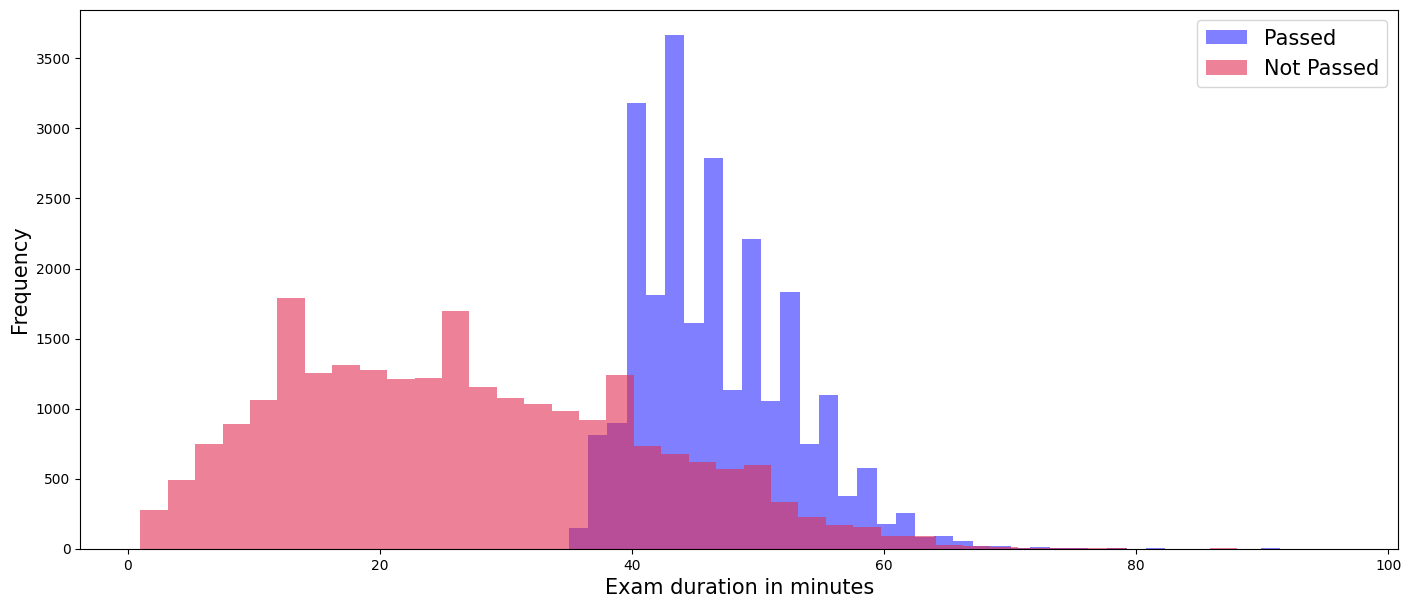

In [ ]:
## Graphs
## Exam duration distribution
import matplotlib.pyplot as plt

passed = data[data['SEISUND'] == 'SOORITATUD']['KESTUS']
not_passed = data[data['SEISUND'] == 'MITTE_SOORITATUD']['KESTUS']

plt.figure(figsize=(17,7))
plt.hist(passed, bins=40, alpha=0.5, label='Passed', color='blue')
plt.hist(not_passed, bins=40, alpha=0.6, label='Not Passed', color='#E12E54')
plt.xlabel('Exam duration in minutes', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(fontsize=15)
plt.show()

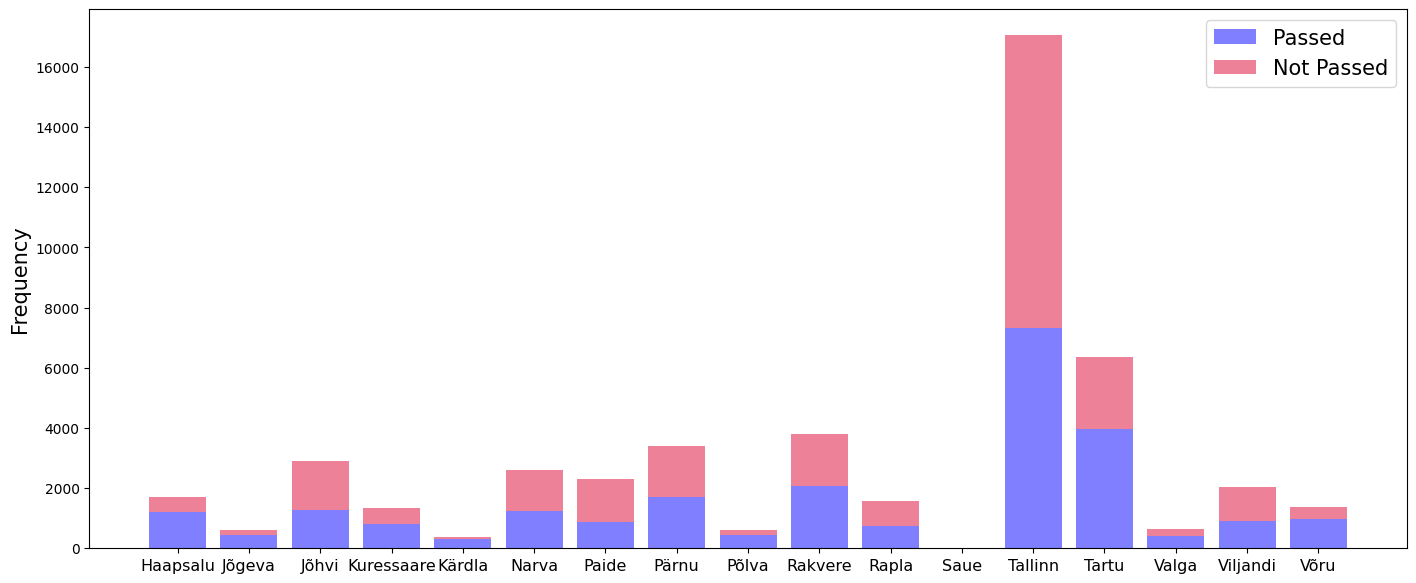

In [ ]:
passed = data[data['SEISUND'] == 'SOORITATUD']
not_passed = data[data['SEISUND'] == 'MITTE_SOORITATUD']
cities = data['BYROO'].unique()
cities = cities[np.argsort(cities)]

passed2 = [len(passed[passed['BYROO'] == city]) for city in cities]
not_passed2 = [len(not_passed[not_passed['BYROO'] == city]) for city in cities]

plt.figure(figsize=(17,7))
plt.bar(cities, passed2, color='#7F7FFF', label='Passed')
plt.bar(cities, not_passed2, bottom=passed2, color='#ED8198', label='Not Passed')
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=11.5)
plt.legend(fontsize=15)
plt.show()

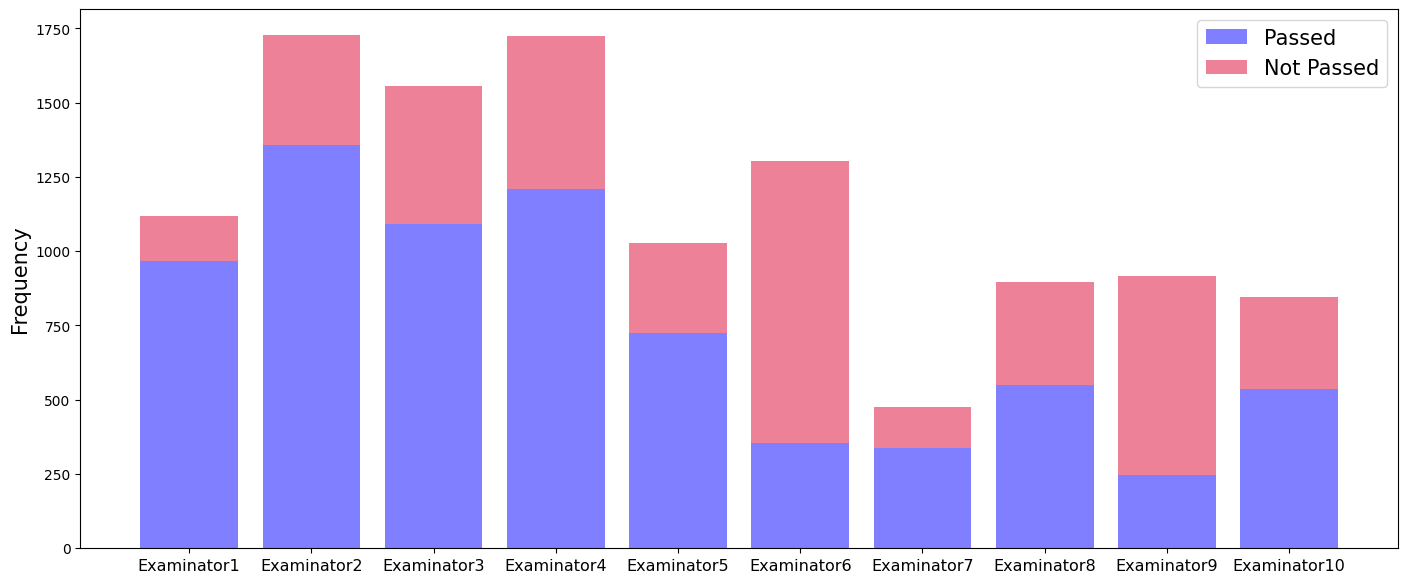

In [ ]:
## Exams passed and not passed based on examinator

# These are most important examinators:
# EKSAMINEERIJA_5c9ee299be483144 9.253931999206543
# EKSAMINEERIJA_4ee4a4702131dac3 9.689840316772461
# EKSAMINEERIJA_3d6f4cd3cca10b28 9.917737007141113
# EKSAMINEERIJA_b3e368548c216eb8 14.2548828125
# EKSAMINEERIJA_e14095bf73a253c7 17.54462432861328
# EKSAMINEERIJA_faeaf99580d6be30 17.718341827392578
# EKSAMINEERIJA_bf2b7218d36e2a3d 18.53909683227539
# EKSAMINEERIJA_ea58f592917668cf 19.708385467529297
# EKSAMINEERIJA_31451a368e962058 36.393985748291016
# EKSAMINEERIJA_844452b4e4bac2ef 41.46123504638672
names = ['Examinator1', 'Examinator2', 'Examinator3', 'Examinator4', 'Examinator5', 'Examinator6', 'Examinator7', 'Examinator8', 'Examinator9',
         'Examinator10']
ids = ['844452b4e4bac2ef', '31451a368e962058', 'ea58f592917668cf', 'bf2b7218d36e2a3d', 'faeaf99580d6be30', 'e14095bf73a253c7', 'b3e368548c216eb8',
       '3d6f4cd3cca10b28', '4ee4a4702131dac3', '5c9ee299be483144']

passed = data[data['SEISUND'] == 'SOORITATUD']
not_passed = data[data['SEISUND'] == 'MITTE_SOORITATUD']
passed2 = [len(passed[passed['EKSAMINEERIJA'] == id]) for id in ids]
not_passed2 = [len(not_passed[not_passed['EKSAMINEERIJA'] == id]) for id in ids]

plt.figure(figsize=(17,7))
plt.bar(ids, passed2, color='#7F7FFF', label='Passed')
plt.bar(ids, not_passed2, bottom=passed2, color='#ED8198', label='Not Passed')
plt.ylabel('Frequency', fontsize=15)
plt.xticks(range(len(names)), names, fontsize=11.5)
plt.legend(fontsize=15)
plt.show()

## Hot-encoding "Mittearvestatud" column

In [ ]:
reasons = []

data_reasons_HEC = data.copy()

for index, row in data_reasons_HEC[data_reasons_HEC["SEISUND"] == "MITTE_SOORITATUD"].iterrows():
  strings = row['MITTEARVESTATUD'].split('|')
  for elem in strings:
    reasons.append(elem)

reasons_list = Counter(reasons)

#Creating columns
zeros = [0 for i in range(len(data_reasons_HEC))]
for reason in reasons_list.most_common():
  columnName = "MITTE_SOORITATUD_" + str(reason[0])
  data_reasons_HEC.loc[:, columnName] = zeros

# Adding info to columns
for index, row in data_reasons_HEC.iterrows():
  reasons_split = row['MITTEARVESTATUD'].split('|')
  for elem in reasons_split:
    columnName = "MITTE_SOORITATUD_" + str(elem)
    data_reasons_HEC.at[index, columnName] = 1

# Spliting the data

Train set 90%, val set 5% and tests set 5%.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(1111)

# Replacing values in the 'SEISUND' (results) column with integer values.
data['SEISUND'] = data['SEISUND'].str.replace('MITTE_SOORITATUD', '0', regex=True)
data['SEISUND'] = data['SEISUND'].str.replace('SOORITATUD', '1', regex=True)
data['SEISUND'] = (data['SEISUND']).astype(int)

# We remove some unnecessary column (they say much information about the exam result or not enough)
data_dropped_columns = data.drop(columns=['EKSAMI_SOORITAJA', 'SOIDUOPETAJA_KAASAS', 'KATK_POHJUS', 'MITTEARVESTATUD', 'VEAD',  'KESTUS', 'ERITINGIMUSED'])

data_encoded = pd.get_dummies(data_dropped_columns, columns=[ 'KUUPAEV', 'BYROO', 'VIIMANE_AUTOKOOL', 'KATEGOORIA', 'EKSAMINEERIJA'])
data_encoded = data_encoded.dropna()

# Splitting the data
train_val, test = train_test_split(data_encoded, random_state = 111, test_size = 0.05)

train, val = train_test_split(train_val, random_state = 111, test_size = 1/19)

train_X = train.drop('SEISUND', axis=1)
train_y = train['SEISUND']

test_X = test.drop('SEISUND', axis=1)
test_y = test['SEISUND']

val_X = val.drop('SEISUND', axis=1)
val_y = val['SEISUND']


<ipython-input-14-4363ff9c53ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SEISUND'] = data['SEISUND'].str.replace('MITTE_SOORITATUD', '0', regex=True)
<ipython-input-14-4363ff9c53ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SEISUND'] = data['SEISUND'].str.replace('SOORITATUD', '1', regex=True)
<ipython-input-14-4363ff9c53ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

# Simple ML models

First we try some simple machine learning classification models.

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a model
model_DTR = DecisionTreeClassifier(max_depth=5)

# Fit the model
model_DTR.fit(X=train_X, y=train_y)

# Make predictions
y_pred_DTR = model_DTR.predict(test_X)

# Evaluate accuracy
accuracy_DTR = accuracy_score(test_y, y_pred_DTR)
print(f'Accuracy for DecisionTreeClassifier: {accuracy_DTR}')

Accuracy for DecisionTreeClassifier: 0.6023007395234182


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1, 5, 10, 15, 20, 25, 50, 75, 100]

for i in neighbors:
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(train_X, train_y)

  y_pred_KNN = model_knn.predict(test_X)

  accuracy_KNN = accuracy_score(test_y, y_pred_KNN)
  print('Accuracy for KNN (' + str(i) + f' neighbors): {accuracy_KNN}')

Accuracy for KNN (1 neighbors): 0.5805258833196385
Accuracy for KNN (5 neighbors): 0.594494658997535
Accuracy for KNN (10 neighbors): 0.604354971240756
Accuracy for KNN (15 neighbors): 0.6175020542317173
Accuracy for KNN (20 neighbors): 0.6170912078882498
Accuracy for KNN (25 neighbors): 0.6138044371405095
Accuracy for KNN (50 neighbors): 0.6146261298274446
Accuracy for KNN (75 neighbors): 0.6265406737880033
Accuracy for KNN (100 neighbors): 0.6273623664749384


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()
model_logreg.fit(train_X, train_y)

y_pred_logreg = model_logreg.predict(test_X)

accuracy_logreg = accuracy_score(test_y, y_pred_logreg)
print(f'Accuracy for Logistic Regression: {accuracy_KNN}')

Accuracy for Logistic Regression: 0.6273623664749384


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ensemble learning

Now we try multiple different ensemble learning models.

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost wants data to be wrapped into special formats
dtrain = xgb.DMatrix(train_X, label=train_y, enable_categorical=True)
dval = xgb.DMatrix(val_X, label=val_y, enable_categorical=True)
dtest = xgb.DMatrix(test_X, label=test_y, enable_categorical=True)

# Define the XGBoost parameters (you can add more parameters if you want)
params = {
    "num_class": 2,
    "num_boost_round": 50,
    "early_stopping_rounds": 10 # If nothing seems to improve for * * iterations - stop
}

# Train for training and val for validation
eval_list = [(dtrain, 'train'), (dval, 'eval')]

# Train the XGBoost model
XGBmodel = xgb.train(params, dtrain, 80, eval_list)

y_pred_XGB = XGBmodel.predict(dtest)
predictions_XGB = [int(elem) for elem in y_pred_XGB]
test_labels_XGB = [int(elem) for elem in test_y.to_numpy()]
correct_XGB = [predictions_XGB[i] == test_labels_XGB[i] for i in range(len(test_labels_XGB))]
accuracy_XGB = np.sum(correct_XGB)/len(test_labels_XGB)
print(f'Accuracy for XGBoost: {accuracy_XGB}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:41:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_rounds", "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-mlogloss:0.67664	eval-mlogloss:0.67667
[1]	train-mlogloss:0.66762	eval-mlogloss:0.66830
[2]	train-mlogloss:0.66310	eval-mlogloss:0.66464
[3]	train-mlogloss:0.65810	eval-mlogloss:0.66185
[4]	train-mlogloss:0.65531	eval-mlogloss:0.65999
[5]	train-mlogloss:0.65301	eval-mlogloss:0.65784
[6]	train-mlogloss:0.65119	eval-mlogloss:0.65682
[7]	train-mlogloss:0.64975	eval-mlogloss:0.65582
[8]	train-mlogloss:0.64859	eval-mlogloss:0.65504
[9]	train-mlogloss:0.64737	eval-mlogloss:0.65476
[10]	train-mlogloss:0.64623	eval-mlogloss:0.65430
[11]	train-mlogloss:0.64516	eval-mlogloss:0.65327
[12]	train-mlogloss:0.64416	eval-mlogloss:0.65242
[13]	train-mlogloss:0.64328	eval-mlogloss:0.65231
[14]	train-mlogloss:0.64254	eval-mlogloss:0.65201
[15]	train-mlogloss:0.64173	eval-mlogloss:0.65157
[16]	train-mlogloss:0.64097	eval-mlogloss:0.65145
[17]	train-mlogloss:0.64027	eval-mlogloss:0.65036
[18]	train-mlogloss:0.63956	eval-mlogloss:0.64997
[19]	train-mlogloss:0.63878	eval-mlogloss:0.64951
[20]	train

In [ ]:
# Here we see, which parameters are most important.
# For our data, the most important column is 'EKSAMINEERIJA' (examiner).
scores = XGBmodel.get_score(importance_type='gain')
sortedScores = sorted(scores.items(), key=lambda x:x[1])

f = open("XGBoost_parameter_scores_sorted.txt", "a")
for elem in sortedScores:
  f.write(elem[0] + " " + str(elem[1]) + "\n")
f.close()

## XGBoost - confusion matrix

Next, let see how the confusion matrix looks like for out XGBoost model.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y.to_numpy().astype(int), y_pred_XGB.astype(int)))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      1145
           1       0.66      0.63      0.65      1289

    accuracy                           0.64      2434
   macro avg       0.63      0.64      0.63      2434
weighted avg       0.64      0.64      0.64      2434



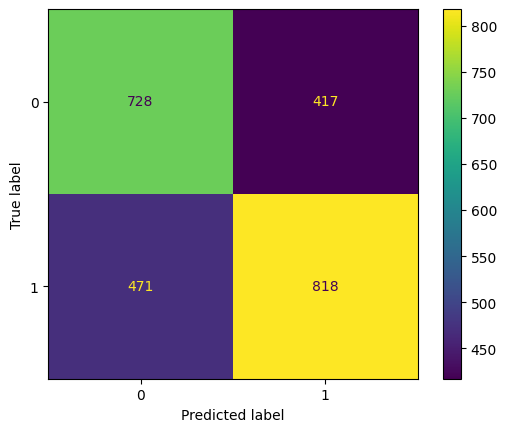

In [ ]:
import matplotlib as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(test_y.to_numpy().astype(int), y_pred_XGB.astype(int))
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(train_X, train_y)

y_pred_RF = model_RF.predict(test_X)

accuracy_RF = accuracy_score(test_y, y_pred_RF)
print(f'Accuracy for Random Forest: {accuracy_RF}')

Accuracy for Random Forest: 0.594494658997535


## Hard Majority voting

In [ ]:
# Putting all the simple models together

y_pred_DTR = y_pred_DTR.astype(int)
y_pred_KNN = y_pred_KNN.astype(int)
y_pred_logreg = y_pred_logreg.astype(int)

predictions = {'DTR': y_pred_DTR, 'KNN': y_pred_KNN, 'LOGREG': y_pred_logreg}
majority_voting = pd.DataFrame(data=predictions, dtype=int)

majority_voting['SEISUND_N'] = majority_voting[['DTR', 'KNN', 'LOGREG']].mode(axis=1)

print(f"Accuracy of ensemble of DTR, KNN and LOGREG {(np.sum(majority_voting['SEISUND_N'].astype(int) == np.asarray(test_y).astype(int))/len(test_y)*100)}%")


Accuracy of ensemble of DTR, KNN and LOGREG 63.722267871815944%


## Bagging

In [ ]:
max_depths = [1, 5, 10, 15, 20, 25, 50, 75, 100]

In [ ]:
from sklearn.ensemble import BaggingClassifier

np.random.seed(1111)

for depth in max_depths:
  n_estimators_ = depth
  bagger = BaggingClassifier(n_estimators=n_estimators_, max_samples=0.8, bootstrap = True)
  bagger.fit(train_X, train_y)

  print(f"Accuracy of sklearn bagging with {n_estimators_} estimators {bagger.score(test_X, test_y)*100}%")

Accuracy of sklearn bagging with 1 estimators 57.02547247329499%
Accuracy of sklearn bagging with 5 estimators 58.915365653245686%
Accuracy of sklearn bagging with 10 estimators 58.463434675431394%
Accuracy of sklearn bagging with 15 estimators 59.20295809367296%
Accuracy of sklearn bagging with 20 estimators 59.0797041906327%
Accuracy of sklearn bagging with 25 estimators 59.03861955628595%
Accuracy of sklearn bagging with 50 estimators 58.874281018898934%
Accuracy of sklearn bagging with 75 estimators 59.65488907148726%
Accuracy of sklearn bagging with 100 estimators 59.94248151191455%


## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

for depth in max_depths:
  n_estimators_ = depth
  adaboost = AdaBoostClassifier(n_estimators=n_estimators_, random_state=1)
  adaboost.fit(train_X, train_y)

  print(f"Accuracy of AdaBoost with {n_estimators_} estimators {adaboost.score(test_X, test_y)*100}%")

Accuracy of AdaBoost with 1 estimators 56.039441248972885%
Accuracy of AdaBoost with 5 estimators 57.43631881676253%
Accuracy of AdaBoost with 10 estimators 59.326211996713226%
Accuracy of AdaBoost with 15 estimators 61.09285127362366%
Accuracy of AdaBoost with 20 estimators 60.887428101889896%
Accuracy of AdaBoost with 25 estimators 61.4215283483977%
Accuracy of AdaBoost with 50 estimators 62.32539030402629%
Accuracy of AdaBoost with 75 estimators 62.73623664749384%
Accuracy of AdaBoost with 100 estimators 62.73623664749384%


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

for depth in max_depths:
  n_estimators_ = depth
  gbm = GradientBoostingClassifier(n_estimators=n_estimators_, random_state=1)
  gbm.fit(train_X, train_y)
  print(f"Accuracy of sklearn Gradient Boosting with {n_estimators_} estimators {adaboost.score(test_X, test_y)*100}%")

Accuracy of sklearn Gradient Boosting with 1 estimators 62.73623664749384%
Accuracy of sklearn Gradient Boosting with 5 estimators 62.73623664749384%
Accuracy of sklearn Gradient Boosting with 10 estimators 62.73623664749384%
Accuracy of sklearn Gradient Boosting with 15 estimators 62.73623664749384%
Accuracy of sklearn Gradient Boosting with 20 estimators 62.73623664749384%
Accuracy of sklearn Gradient Boosting with 25 estimators 62.73623664749384%
Accuracy of sklearn Gradient Boosting with 50 estimators 62.73623664749384%
Accuracy of sklearn Gradient Boosting with 75 estimators 62.73623664749384%
Accuracy of sklearn Gradient Boosting with 100 estimators 62.73623664749384%


## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

estimators = [('decision_tree', DecisionTreeClassifier()),
              ('knn', KNeighborsClassifier()),
              ('rf', RandomForestClassifier())]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=SVC(), cv=4)
stacking_classifier.fit(train_X, train_y)
print(f"Accuracy of sklearn stacking ensemble: {stacking_classifier.score(test_X, test_y)*100}%")

Accuracy of sklearn stacking ensemble: 60.599835661462606%


# Adding weather and population data

We also wanted to see, if our model would be better if we added weather and population information to our data.

In [ ]:
data = pd.concat([se_2021, se_2022, se_2023], axis=0)
data.reset_index(drop=True, inplace=True)

url_pop = "https://drive.google.com/file/d/14_j4v8Y-Zx7io57xZCfDZuZ4cekuouu1/view?usp=sharing"
se_pop = "population.csv"
gdown.download(url_pop, se_pop, fuzzy=True)
population = pd.read_csv("population.csv", skiprows=2,encoding='utf-8' )

url_wea = "https://drive.google.com/file/d/1NbN60Q-uazl7nZp5dHJ43y7A_5DIPDAY/view?usp=sharing"
se_wea = "weather.csv"
gdown.download(url_wea, se_wea, fuzzy=True)
weather = pd.read_csv("weather.csv", sep=";",encoding='utf-8', decimal=',')
weather = weather.drop(columns=['Unnamed: 8', 'Unnamed: 9'])
weather = weather.drop(weather.index[-1])


Downloading...
From: https://drive.google.com/uc?id=14_j4v8Y-Zx7io57xZCfDZuZ4cekuouu1
To: /content/population.csv
100%|██████████| 2.64k/2.64k [00:00<00:00, 6.24MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NbN60Q-uazl7nZp5dHJ43y7A_5DIPDAY
To: /content/weather.csv
100%|██████████| 1.71k/1.71k [00:00<00:00, 4.75MB/s]


We have to do the same preprosessing steps again for our new data.

In [ ]:
# Filling failure reasons for passed tests
data['MITTEARVESTATUD'] = data['MITTEARVESTATUD'].fillna('-')

# Remove rows that have the duration: 1. more than 100 minutes or less than 35 minutes (for passed tests)
indexRows = data[ (data["KESTUS"] < 35) & (data["SEISUND"] == 'SOORITATUD')].index
data.drop(indexRows , inplace=True)

indexRows = data[ (data["KESTUS"] > 100)].index
data.drop(indexRows , inplace=True)

# Only leave rows, where the result equals "SOORITATUD" or "MITTE-SOORITATUD".
indexRows = data[ (data["SEISUND"] == 'KATKESTATUD') | (data["SEISUND"] == 'EI_ILMUNUD_KOHALE')].index
data.drop(indexRows , inplace=True)

# Leave only B-category
data = data[data['KATEGOORIA'] == 'B']

# Splitting the 'KUUPAEV' (date) column.
data[['AASTA', 'KUU']] = data['KUUPAEV'].str.split('-', expand=True)
data["AASTA"]=data["AASTA"].astype(int)
data["KUU"] =data["KUU"].str.lstrip('0')
data["KUU"]=data["KUU"].astype(int)
weather["Year"]=weather["Year"].astype(int)
weather["Month"]=weather["Month"].astype(int)

# Adding weather info
data = pd.merge(data, weather, left_on=['AASTA', 'KUU'], right_on=['Year', 'Month'], how='left')

#Adding population info
mapping_dict = {'Tallinn': 'Harju maakond', 'Tartu': 'Tartu maakond', 'Pärnu': 'Pärnu maakond',
                'Kärdla': "Hiiu maakond", 'Narva': "Ida-Viru maakond","Jõgeva": "Jõgeva maakond","Paide": "Järva maakond",
          "Haapsalu":"Lääne maakond","Rakvere":"Lääne-Viru maakond","Põlva":"Põlva maakond","Rapla":"Rapla maakond",
          "Kuressaare":"Saare maakond", "Valga":"Valga maakond", "Viljandi":"Viljandi maakond", "Võru": "Võru maakond", "Jõhvi":"Ida-Viru maakond", "Saue":"Harju maakond"}
data['MappedKey'] = data['BYROO'].map(mapping_dict)
data = pd.merge(data, population, left_on=[ "AASTA","MappedKey"], right_on=['Aasta', "Maakond"], how='left')

# Removing columns
data = data.drop(columns=['KUUPAEV', 'Aasta', 'Year', 'Month', 'MappedKey'], axis=1)

# Renaming columns
data = data.rename(columns=
{'average_temp': 'KESK_TEMP',
'max_temp': 'MAX_TEMP',
'min_temp': 'MIN_TEMP',
'avg_rain, mm' : "KESK_VIHM" ,
'max_rain ': "MAX_VIHM",
'sun' : "PÄIKE",
'Maakond': "MAAKOND",
'Rahvused kokku Mehed ja naised' : "RAHVAARV" ,
'Rahvused kokku Mehed': "RAHVAARV_MEHED" ,
'Rahvused kokku Naised':"RAHVAARV_NAISED"
})


- KESK_TEMP - average temperature of the month
- MAX_TEMP - maximum temperature of the month
- MIN_TEMP - minimum temperature of the month
- KESK_VIHM - average rainfall in millimeters of the month
- MAX_VIHM - maximum rainfall in millimeters of the month
- PÄIKE - sunshine in hours (per month)
- MAAKOND - county of bureau
- RAHVAARV - population in the county
- RAHVAARV_MEHED - population of men in the county
- RAHVAARV_NAISED- population of women in the county


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(1111)

data['SEISUND'] = data['SEISUND'].str.replace('MITTE_SOORITATUD', '0', regex=True)
data['SEISUND'] = data['SEISUND'].str.replace('SOORITATUD', '1', regex=True)
data['SEISUND'] = (data['SEISUND']).astype(int)

data_dropped_columns = data.drop(columns=['EKSAMI_SOORITAJA', 'SOIDUOPETAJA_KAASAS', 'KATK_POHJUS', 'MITTEARVESTATUD', 'VEAD',  'KESTUS', 'ERITINGIMUSED'])

data_encoded = pd.get_dummies(data_dropped_columns, columns=['BYROO', 'VIIMANE_AUTOKOOL', 'KATEGOORIA', 'EKSAMINEERIJA', 'MAAKOND'])
data_encoded = data_encoded.dropna()

train_val, test = train_test_split(data_encoded, random_state = 111, test_size = 0.05)

train, val = train_test_split(train_val, random_state = 111, test_size = 1/19)

train_X = train.drop('SEISUND', axis=1)
train_y = train['SEISUND']

test_X = test.drop('SEISUND', axis=1)
test_y = test['SEISUND']

val_X = val.drop('SEISUND', axis=1)
val_y = val['SEISUND']

First we try Decision Tree Classifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_DTR = DecisionTreeClassifier(max_depth=5)
model_DTR.fit(X=train_X, y=train_y)

# Make predictions
y_pred_DTR = model_DTR.predict(test_X)

# Evaluate accuracy
accuracy_DTR = accuracy_score(test_y, y_pred_DTR)
print(f'Accuracy for Decision Tree Classifier: {accuracy_DTR}')

Accuracy for Decision Tree Classifier: 0.5751961639058413


Then we try AdaBoost:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

for depth in max_depths:
  n_estimators_ = depth
  adaboost = AdaBoostClassifier(n_estimators=n_estimators_, estimator=DecisionTreeClassifier(max_depth=1), random_state=1)
  adaboost.fit(train_X, train_y)

  print(f"Accuracy of AdaBoost with {n_estimators_} estimators {adaboost.score(test_X, test_y)*100}%")

Accuracy of AdaBoost with 1 estimators 54.29380993897123%
Accuracy of AdaBoost with 5 estimators 56.73496076721884%
Accuracy of AdaBoost with 10 estimators 58.93635571054926%
Accuracy of AdaBoost with 15 estimators 59.59023539668701%
Accuracy of AdaBoost with 20 estimators 60.244115082824756%
Accuracy of AdaBoost with 25 estimators 60.09154315605929%
Accuracy of AdaBoost with 50 estimators 61.00697471665214%
Accuracy of AdaBoost with 75 estimators 60.61464690496948%
Accuracy of AdaBoost with 100 estimators 61.46469049694856%


As we can see, this new information didn't help our model to predict the driving test outcomes.

# Duration based on reasons

We also wanted to see if for the failed tests we can predict the duration of the test based on the failure reasons.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

data_reasons = data_reasons_HEC.drop(columns=['EKSAMI_SOORITAJA', 'SOIDUOPETAJA_KAASAS', 'KATK_POHJUS', 'MITTEARVESTATUD', 'VEAD', 'ERITINGIMUSED', 'VIIMANE_AUTOKOOL'])

data_reasons['SEISUND'] = data_reasons['SEISUND'].str.replace('MITTE_SOORITATUD', '0', regex=True)
data_reasons['SEISUND'] = data_reasons['SEISUND'].str.replace('SOORITATUD', '1', regex=True)
data_reasons['SEISUND'] = (data_reasons['SEISUND']).astype(int)

indexRows = data_reasons[ (data_reasons['SEISUND'] == 1)].index
data_reasons.drop(indexRows , inplace=True)

data_encoded = pd.get_dummies(data_reasons, columns=['KUUPAEV', 'BYROO', 'KATEGOORIA', 'EKSAMINEERIJA'])

df_encoded = data_encoded.dropna()

train_LR, val_test_LR = train_test_split(df_encoded, random_state = 111, test_size = 0.2)
val_LR, test_LR = train_test_split(val_test_LR, random_state = 111, test_size = 0.5)

train_X_LR = train_LR.drop('KESTUS', axis=1)
train_y_LR = train_LR['KESTUS']

val_X_LR = val_LR.drop('KESTUS', axis=1)
val_y_LR = val_LR['KESTUS']

test_X_LR = test_LR.drop('KESTUS', axis=1)
test_y_LR = test_LR['KESTUS']

## Benchmark avarage

In [ ]:
# Average duration
columnAverage = test_y_LR.mean()
sum = 0

# Predicting average duration for every value in test set.
for i in range(len(test_y_LR)):
  sum += abs(columnAverage - test_y_LR.to_numpy()[i])

average = sum / len(test_y_LR)
print(average)

11.257621254770376


## Ridge

In [ ]:
lambda_ = 1
lr_ridge = Ridge(alpha = lambda_)
lr_ridge.fit(train_X_LR, train_y_LR)
y_pred_ridge = lr_ridge.predict(test_X_LR)

# We go through all of the predictions and see, what is the average difference between the prediction and actual duration.
sum = 0
differences = []

for i in range(len(y_pred_ridge)):
  sum += abs(y_pred_ridge[i] - test_y_LR.to_numpy()[i])
  differences.append(y_pred_ridge[i] - test_y_LR.to_numpy()[i])

average = sum / len(y_pred_ridge)
print(f"Average predicted difference (Ridge): {average}")

Average predicted difference (Ridge): 10.221298350489915


(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,   4.,   6.,   5.,
          8.,  20.,  15.,  24.,  25.,  28.,  35.,  61.,  56.,  65.,  70.,
         69.,  83.,  81.,  94.,  78.,  87.,  86.,  85., 109., 108., 106.,
        110., 110., 125., 100., 116., 103.,  94.,  55.,  54.,  30.,  28.,
         23.,   9.,   9.,   6.,   1.,   4.]),
 array([-44.98614176, -43.47039086, -41.95463996, -40.43888906,
        -38.92313816, -37.40738726, -35.89163637, -34.37588547,
        -32.86013457, -31.34438367, -29.82863277, -28.31288187,
        -26.79713097, -25.28138008, -23.76562918, -22.24987828,
        -20.73412738, -19.21837648, -17.70262558, -16.18687468,
        -14.67112378, -13.15537289, -11.63962199, -10.12387109,
         -8.60812019,  -7.09236929,  -5.57661839,  -4.06086749,
         -2.5451166 ,  -1.0293657 ,   0.4863852 ,   2.0021361 ,
          3.517887  ,   5.0336379 ,   6.5493888 ,   8.0651397 ,
          9.58089059,  11.09664149,  12.61239239,  14.12814329,
         15.643894

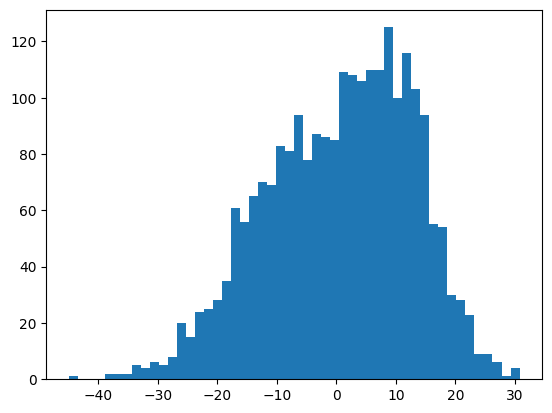

In [ ]:
import matplotlib.pyplot as plt

plt.hist(differences, bins = 50)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X_LR, train_y_LR)
y_pred_l_reg = lr.predict(test_X_LR)

sum = 0

for i in range(len(y_pred_l_reg)):
  sum += abs(y_pred_l_reg[i] - test_y_LR.to_numpy()[i])

average = sum / len(y_pred_l_reg)
print(f"Average predicted difference (Linear Regrssion): {average}")

Average predicted difference (Linear Regrssion): 10.220074185342355


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

for depth in max_depths:

  dtr = DecisionTreeRegressor(max_depth = depth)
  dtr.fit(train_X_LR, train_y_LR)

  y_pred_dtr = dtr.predict(test_X_LR)

  sum = 0
  for i in range(len(y_pred_dtr)):
    sum += abs(y_pred_dtr[i] - test_y_LR.to_numpy()[i])
    differences.append(y_pred_dtr[i] - test_y_LR.to_numpy()[i])

  average = sum / len(y_pred_dtr)
  print("Max_depth =", depth, "Average:", average)

Max_depth = 1 Average: 11.28449393363366
Max_depth = 5 Average: 10.90533105651895
Max_depth = 10 Average: 10.550432310417982
Max_depth = 15 Average: 10.351385127685216
Max_depth = 20 Average: 10.447273075208464
Max_depth = 25 Average: 10.539015518547167
Max_depth = 50 Average: 11.261872668783845
Max_depth = 75 Average: 11.49460785287761
Max_depth = 100 Average: 11.610836520427103
